<a href="https://colab.research.google.com/github/lakshmanpadigala/SMAI_S22_5/blob/main/Final_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# train_acc=[]
# test_acc=[]
# xentropy=[]
# with open('/content/RandomEarse_SVHN_mean.txt','r') as f:
#     l=f.readlines()
# for i in l:
#     if(i.startswith('Epoch')):
#         a=i.split(',')[-2].split('=')[-1]
#         train_acc.append(float(a))
#         e=i.split(',')[-1].split('=')[-1].split(']')[0]
#         xentropy.append(float(e))
#     elif(i.startswith('test_acc')):
#         a=i.split(':')[-1]
#         test_acc.append(float(a))

# import pickle
# dict_values = {}
# dict_values['train_acc'] = train_acc
# dict_values['test_acc'] = test_acc
# dict_values['loss'] = xentropy

# with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/RandomEarse_SVHN_mean.pkl', 'wb') as f:
#     pickle.dump(dict_values, f)

###DataSet

In [7]:
import pdb
import argparse
import numpy as np
from tqdm import tqdm
import random
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
import matplotlib as plt
from torchvision.utils import make_grid
from torchvision import datasets, transforms
import math
import time

In [8]:
train_dataset = datasets.SVHN(root='data/',split='train',download=True)
test_dataset = datasets.SVHN(root='data/',split='test',download=True)

  0%|          | 0/182040794 [00:00<?, ?it/s]

  0%|          | 0/64275384 [00:00<?, ?it/s]

In [9]:
test_dataset.data.shape,test_dataset.labels.shape,

((26032, 3, 32, 32), (26032,))

{5: 2384, 2: 4149, 1: 5099, 0: 1744, 6: 1977, 9: 1595, 8: 1660, 3: 2882, 4: 2523, 7: 2019}
{5: 9.157959434542102, 2: 15.938076213890596, 1: 19.587430854333128, 0: 6.699446834665028, 6: 7.594499078057775, 9: 6.127074370006146, 8: 6.376767055931162, 3: 11.070989551321452, 4: 9.691917639827905, 7: 7.755838967424708}


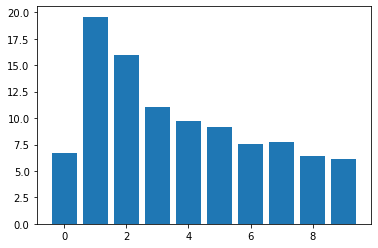

In [17]:
y = test_dataset.labels
count_dict = {}
for i in y:
  if i in count_dict.keys():
    count_dict[i] += 1
  else:
    count_dict[i] = 1
print(count_dict)
for key in count_dict.keys():
  count_dict[key] /= 260.32
print(count_dict) 
plt.bar(*zip(*count_dict.items()))
plt.show()

###Results

In [80]:
import matplotlib.pyplot as plt
import pickle

In [81]:
with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/ResNet18_NoCutOut_SVHN.pkl', 'rb') as f:
    ResNet18_NoCutOut_SVHN = pickle.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/ResNet18_cutOut_SVHN_patch_8.pkl', 'rb') as f:
    ResNet18_cutOut_SVHN_patch_8 = pickle.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/ResNet18_cutOut_SVHN_patch_12.pkl', 'rb') as f:
    ResNet18_cutOut_SVHN_patch_12 = pickle.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/ResNet18_cutOut_SVHN_patch_16.pkl', 'rb') as f:
    ResNet18_cutOut_SVHN_patch_16 = pickle.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/ResNet18_cutOut_SVHN_patch_20.pkl', 'rb') as f:
    ResNet18_cutOut_SVHN_patch_20 = pickle.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/ResNet18_cutOut_SVHN_patch8_holes2.pkl', 'rb') as f:
    ResNet18_cutOut_SVHN_patch_8_holes_2 = pickle.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/ResNet18_cutOut_SVHN_patch8_holes3.pkl', 'rb') as f:
    ResNet18_cutOut_SVHN_patch_8_holes_3 = pickle.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/ResNet18_cutOut_SVHN_patch12_holes_2.pkl', 'rb') as f:
    ResNet18_cutOut_SVHN_patch_12_holes_2 = pickle.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/ResNet18_cutOut_SVHN_patch12_3.pkl', 'rb') as f:
    ResNet18_cutOut_SVHN_patch_12_holes_3 = pickle.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/wrn16_8_cutout_svhn_patch20.pkl', 'rb') as f:
    wrn16_8_cutout_svhn_patch20 = pickle.load(f)
    f.close()
with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/wrn16_8_no_cutout_svhn_patch20.pkl', 'rb') as f:
    wrn16_8_no_cutout_svhn_patch20 = pickle.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/RandomErase_SVHN_random.pkl', 'rb') as f:
    RandomErase_SVHN_random = pickle.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/Results/RandomEarse_SVHN_mean.pkl', 'rb') as f:
    RandomEarse_SVHN_mean = pickle.load(f)
    f.close()


In [82]:
ResNet18_cutOut_SVHN_patch_20.keys(),RandomErase_SVHN_random.keys()

(dict_keys(['train_acc', 'test_acc', 'loss']),
 dict_keys(['train_acc', 'test_acc', 'loss']))

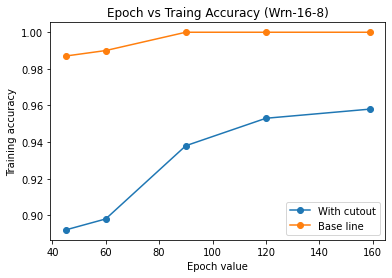

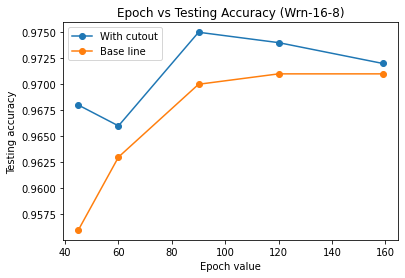

In [73]:
Epoch = [45,60,90,120,159]
cutout_accurices = [wrn16_8_cutout_svhn_patch20['train_acc'][45],wrn16_8_cutout_svhn_patch20['train_acc'][60],wrn16_8_cutout_svhn_patch20['train_acc'][90],wrn16_8_cutout_svhn_patch20['train_acc'][120],wrn16_8_cutout_svhn_patch20['train_acc'][159]]
base_line = [wrn16_8_no_cutout_svhn_patch20['train_acc'][45],wrn16_8_no_cutout_svhn_patch20['train_acc'][60],wrn16_8_no_cutout_svhn_patch20['train_acc'][90],wrn16_8_no_cutout_svhn_patch20['train_acc'][120],wrn16_8_no_cutout_svhn_patch20['train_acc'][159]]
plt.plot(Epoch,cutout_accurices,label = "With cutout",marker='o')
plt.plot(Epoch,base_line,label = "Base line",marker='o')
plt.title('Epoch vs Traing Accuracy (Wrn-16-8)')
plt.xlabel('Epoch value')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()

Epoch = [45,60,90,120,159]
cutout_accurices = [wrn16_8_cutout_svhn_patch20['test_acc'][45],wrn16_8_cutout_svhn_patch20['test_acc'][60],wrn16_8_cutout_svhn_patch20['test_acc'][90],wrn16_8_cutout_svhn_patch20['test_acc'][120],wrn16_8_cutout_svhn_patch20['test_acc'][159]]
base_line = [wrn16_8_no_cutout_svhn_patch20['test_acc'][45],wrn16_8_no_cutout_svhn_patch20['test_acc'][60],wrn16_8_no_cutout_svhn_patch20['test_acc'][90],wrn16_8_no_cutout_svhn_patch20['test_acc'][120],wrn16_8_no_cutout_svhn_patch20['test_acc'][159]]
plt.plot(Epoch,cutout_accurices,label = "With cutout",marker='o')
plt.plot(Epoch,base_line,label = "Base line",marker='o')
plt.title('Epoch vs Testing Accuracy (Wrn-16-8)')
plt.xlabel('Epoch value')
plt.ylabel('Testing accuracy')
plt.legend()
plt.show()

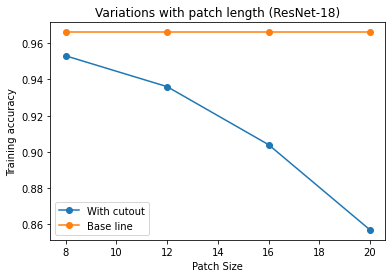

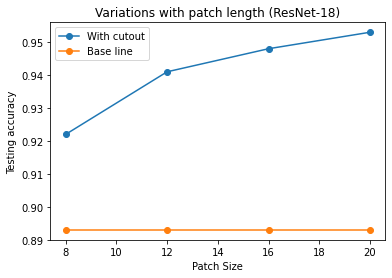

In [84]:
patch_size = [8,12,16,20]
cutout_accurices_train = [ResNet18_cutOut_SVHN_patch_8['train_acc'][75],ResNet18_cutOut_SVHN_patch_12['train_acc'][75],ResNet18_cutOut_SVHN_patch_16['train_acc'][75],ResNet18_cutOut_SVHN_patch_20['train_acc'][75]]
base_line_train = [ResNet18_NoCutOut_SVHN['train_acc'][75] for i in range(4)]
plt.plot(patch_size,cutout_accurices_train,label = "With cutout",marker='o')
plt.plot(patch_size,base_line_train,label = "Base line",marker='o')
plt.title('Variations with patch length (ResNet-18)')
plt.xlabel('Patch Size')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()

patch_size = [8,12,16,20]
cutout_accurices = [ResNet18_cutOut_SVHN_patch_8['test_acc'][75],ResNet18_cutOut_SVHN_patch_12['test_acc'][75],ResNet18_cutOut_SVHN_patch_16['test_acc'][75],ResNet18_cutOut_SVHN_patch_20['test_acc'][75]]
base_line = [ResNet18_NoCutOut_SVHN['test_acc'][75] for i in range(4)]
plt.plot(patch_size,cutout_accurices,label = "With cutout",marker='o')
plt.plot(patch_size,base_line,label = "Base line",marker='o')
plt.title('Variations with patch length (ResNet-18)')
plt.xlabel('Patch Size')
plt.ylabel('Testing accuracy')
plt.legend()
plt.show()

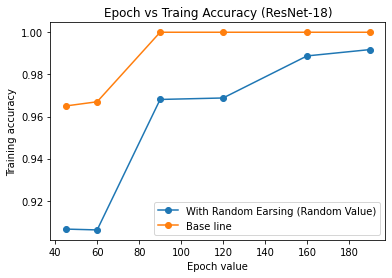

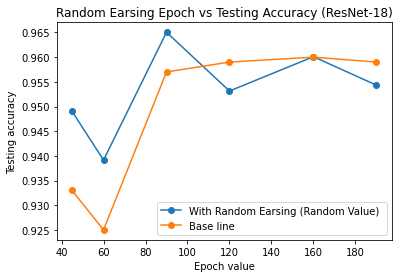

In [86]:
Epoch = [45,60,90,120,160,190]
cutout_accurices_1 = [RandomErase_SVHN_random['train_acc'][45],RandomErase_SVHN_random['train_acc'][60],RandomErase_SVHN_random['train_acc'][90],RandomErase_SVHN_random['train_acc'][120],RandomErase_SVHN_random['train_acc'][160],RandomErase_SVHN_random['train_acc'][190]]
base_line = [ResNet18_NoCutOut_SVHN['train_acc'][45],ResNet18_NoCutOut_SVHN['train_acc'][60],ResNet18_NoCutOut_SVHN['train_acc'][90],ResNet18_NoCutOut_SVHN['train_acc'][120],ResNet18_NoCutOut_SVHN['train_acc'][160],ResNet18_NoCutOut_SVHN['train_acc'][190]]
plt.plot(Epoch,cutout_accurices_1,label = "With Random Earsing (Random Value)",marker='o')
plt.plot(Epoch,base_line,label = "Base line",marker='o')
plt.title('Epoch vs Traing Accuracy (ResNet-18)')
plt.xlabel('Epoch value')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()

Epoch = [45,60,90,120,160,190]
cutout_accurices = [RandomErase_SVHN_random['test_acc'][45],RandomErase_SVHN_random['test_acc'][60],RandomErase_SVHN_random['test_acc'][90],RandomErase_SVHN_random['test_acc'][120],RandomErase_SVHN_random['test_acc'][160],RandomErase_SVHN_random['test_acc'][190]]
base_line = [ResNet18_NoCutOut_SVHN['test_acc'][45],ResNet18_NoCutOut_SVHN['test_acc'][60],ResNet18_NoCutOut_SVHN['test_acc'][90],ResNet18_NoCutOut_SVHN['test_acc'][120],ResNet18_NoCutOut_SVHN['test_acc'][160],ResNet18_NoCutOut_SVHN['test_acc'][190]]
plt.plot(Epoch,cutout_accurices,label = "With Random Earsing (Random Value) ",marker='o')
plt.plot(Epoch,base_line,label = "Base line",marker='o')
plt.title('Random Earsing Epoch vs Testing Accuracy (ResNet-18)')
plt.xlabel('Epoch value')
plt.ylabel('Testing accuracy')
plt.legend()
plt.show()

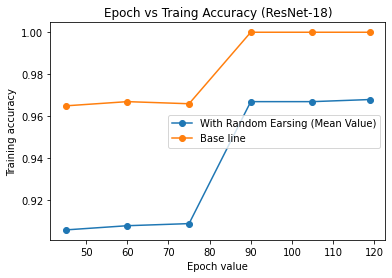

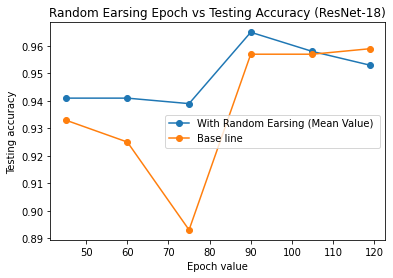

In [90]:
Epoch = [45,60,75,90,105,119]
cutout_accurices_2 = [RandomEarse_SVHN_mean['train_acc'][45],RandomEarse_SVHN_mean['train_acc'][60],RandomEarse_SVHN_mean['train_acc'][75],RandomEarse_SVHN_mean['train_acc'][90],RandomEarse_SVHN_mean['train_acc'][105],RandomEarse_SVHN_mean['train_acc'][119]]
base_line_train = [ResNet18_NoCutOut_SVHN['train_acc'][45],ResNet18_NoCutOut_SVHN['train_acc'][60],ResNet18_NoCutOut_SVHN['train_acc'][75],ResNet18_NoCutOut_SVHN['train_acc'][90],ResNet18_NoCutOut_SVHN['train_acc'][105],ResNet18_NoCutOut_SVHN['train_acc'][119]]
plt.plot(Epoch,cutout_accurices_2,label = "With Random Earsing (Mean Value)",marker='o')
plt.plot(Epoch,base_line_train,label = "Base line",marker='o')
plt.title('Epoch vs Traing Accuracy (ResNet-18)')
plt.xlabel('Epoch value')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()

Epoch = [45,60,75,90,105,119]
cutout_accurices = [RandomEarse_SVHN_mean['test_acc'][45],RandomEarse_SVHN_mean['test_acc'][60],RandomEarse_SVHN_mean['test_acc'][75],RandomEarse_SVHN_mean['test_acc'][90],RandomEarse_SVHN_mean['test_acc'][105],RandomEarse_SVHN_mean['test_acc'][119]]
base_line = [ResNet18_NoCutOut_SVHN['test_acc'][45],ResNet18_NoCutOut_SVHN['test_acc'][60],ResNet18_NoCutOut_SVHN['test_acc'][75],ResNet18_NoCutOut_SVHN['test_acc'][90],ResNet18_NoCutOut_SVHN['test_acc'][105],ResNet18_NoCutOut_SVHN['test_acc'][119]]
plt.plot(Epoch,cutout_accurices,label = "With Random Earsing (Mean Value) ",marker='o')
plt.plot(Epoch,base_line,label = "Base line",marker='o')
plt.title('Random Earsing Epoch vs Testing Accuracy (ResNet-18)')
plt.xlabel('Epoch value')
plt.ylabel('Testing accuracy')
plt.legend()
plt.show()

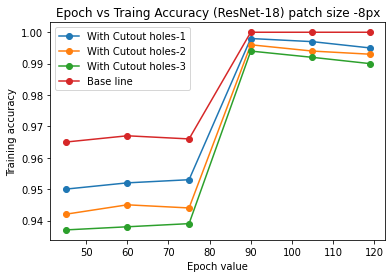

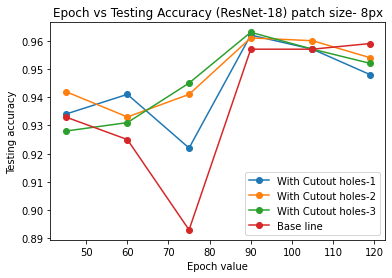

In [88]:
Epoch = [45,60,75,90,105,119]
cutout1_accurices = [ResNet18_cutOut_SVHN_patch_8['train_acc'][45],ResNet18_cutOut_SVHN_patch_8['train_acc'][60],ResNet18_cutOut_SVHN_patch_8['train_acc'][75],ResNet18_cutOut_SVHN_patch_8['train_acc'][90],ResNet18_cutOut_SVHN_patch_8['train_acc'][105],ResNet18_cutOut_SVHN_patch_8['train_acc'][119]]
cutout2_accurices = [ResNet18_cutOut_SVHN_patch_8_holes_2['train_acc'][45],ResNet18_cutOut_SVHN_patch_8_holes_2['train_acc'][60],ResNet18_cutOut_SVHN_patch_8_holes_2['train_acc'][75],ResNet18_cutOut_SVHN_patch_8_holes_2['train_acc'][90],ResNet18_cutOut_SVHN_patch_8_holes_2['train_acc'][105],ResNet18_cutOut_SVHN_patch_8_holes_2['train_acc'][119]]
cutout3_accurices = [ResNet18_cutOut_SVHN_patch_8_holes_3['train_acc'][45],ResNet18_cutOut_SVHN_patch_8_holes_3['train_acc'][60],ResNet18_cutOut_SVHN_patch_8_holes_3['train_acc'][75],ResNet18_cutOut_SVHN_patch_8_holes_3['train_acc'][90],ResNet18_cutOut_SVHN_patch_8_holes_3['train_acc'][105],ResNet18_cutOut_SVHN_patch_8_holes_3['train_acc'][119]]
base_line = [ResNet18_NoCutOut_SVHN['train_acc'][45],ResNet18_NoCutOut_SVHN['train_acc'][60],ResNet18_NoCutOut_SVHN['train_acc'][75],ResNet18_NoCutOut_SVHN['train_acc'][90],ResNet18_NoCutOut_SVHN['train_acc'][105],ResNet18_NoCutOut_SVHN['train_acc'][119]]
plt.plot(Epoch,cutout1_accurices,label = "With Cutout holes-1",marker='o')
plt.plot(Epoch,cutout2_accurices,label = "With Cutout holes-2",marker='o')
plt.plot(Epoch,cutout3_accurices,label = "With Cutout holes-3",marker='o')
plt.plot(Epoch,base_line,label = "Base line",marker='o')
plt.title('Epoch vs Traing Accuracy (ResNet-18) patch size -8px')
plt.xlabel('Epoch value')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()


Epoch = [45,60,75,90,105,119]
cutout1_accurices = [ResNet18_cutOut_SVHN_patch_8['test_acc'][45],ResNet18_cutOut_SVHN_patch_8['test_acc'][60],ResNet18_cutOut_SVHN_patch_8['test_acc'][75],ResNet18_cutOut_SVHN_patch_8['test_acc'][90],ResNet18_cutOut_SVHN_patch_8['test_acc'][105],ResNet18_cutOut_SVHN_patch_8['test_acc'][119]]
cutout2_accurices = [ResNet18_cutOut_SVHN_patch_8_holes_2['test_acc'][45],ResNet18_cutOut_SVHN_patch_8_holes_2['test_acc'][60],ResNet18_cutOut_SVHN_patch_8_holes_2['test_acc'][75],ResNet18_cutOut_SVHN_patch_8_holes_2['test_acc'][90],ResNet18_cutOut_SVHN_patch_8_holes_2['test_acc'][105],ResNet18_cutOut_SVHN_patch_8_holes_2['test_acc'][119]]
cutout3_accurices = [ResNet18_cutOut_SVHN_patch_8_holes_3['test_acc'][45],ResNet18_cutOut_SVHN_patch_8_holes_3['test_acc'][60],ResNet18_cutOut_SVHN_patch_8_holes_3['test_acc'][75],ResNet18_cutOut_SVHN_patch_8_holes_3['test_acc'][90],ResNet18_cutOut_SVHN_patch_8_holes_3['test_acc'][105],ResNet18_cutOut_SVHN_patch_8_holes_3['test_acc'][119]]
base_line = [ResNet18_NoCutOut_SVHN['test_acc'][45],ResNet18_NoCutOut_SVHN['test_acc'][60],ResNet18_NoCutOut_SVHN['test_acc'][75],ResNet18_NoCutOut_SVHN['test_acc'][90],ResNet18_NoCutOut_SVHN['test_acc'][105],ResNet18_NoCutOut_SVHN['test_acc'][119]]
plt.plot(Epoch,cutout1_accurices,label = "With Cutout holes-1",marker='o')
plt.plot(Epoch,cutout2_accurices,label = "With Cutout holes-2",marker='o')
plt.plot(Epoch,cutout3_accurices,label = "With Cutout holes-3",marker='o')
plt.plot(Epoch,base_line,label = "Base line",marker='o')
plt.title('Epoch vs Testing Accuracy (ResNet-18) patch size- 8px')
plt.xlabel('Epoch value')
plt.ylabel('Testing accuracy')
plt.legend()
plt.show()


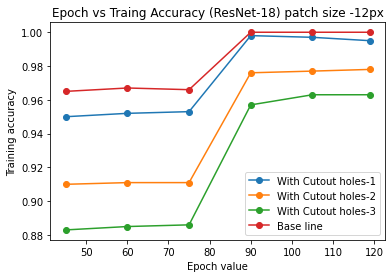

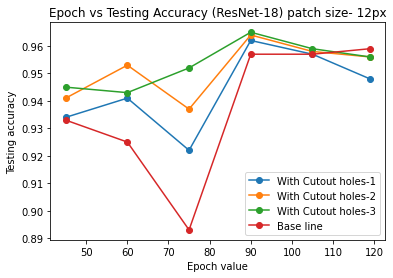

In [90]:
Epoch = [45,60,75,90,105,119]
cutout1_accurices = [ResNet18_cutOut_SVHN_patch_8['train_acc'][45],ResNet18_cutOut_SVHN_patch_8['train_acc'][60],ResNet18_cutOut_SVHN_patch_8['train_acc'][75],ResNet18_cutOut_SVHN_patch_8['train_acc'][90],ResNet18_cutOut_SVHN_patch_8['train_acc'][105],ResNet18_cutOut_SVHN_patch_8['train_acc'][119]]
cutout2_accurices = [ResNet18_cutOut_SVHN_patch_12_holes_2['train_acc'][45],ResNet18_cutOut_SVHN_patch_12_holes_2['train_acc'][60],ResNet18_cutOut_SVHN_patch_12_holes_2['train_acc'][75],ResNet18_cutOut_SVHN_patch_12_holes_2['train_acc'][90],ResNet18_cutOut_SVHN_patch_12_holes_2['train_acc'][105],ResNet18_cutOut_SVHN_patch_12_holes_2['train_acc'][119]]
cutout3_accurices = [ResNet18_cutOut_SVHN_patch_12_holes_3['train_acc'][45],ResNet18_cutOut_SVHN_patch_12_holes_3['train_acc'][60],ResNet18_cutOut_SVHN_patch_12_holes_3['train_acc'][75],ResNet18_cutOut_SVHN_patch_12_holes_3['train_acc'][90],ResNet18_cutOut_SVHN_patch_12_holes_3['train_acc'][105],ResNet18_cutOut_SVHN_patch_12_holes_3['train_acc'][119]]
base_line = [ResNet18_NoCutOut_SVHN['train_acc'][45],ResNet18_NoCutOut_SVHN['train_acc'][60],ResNet18_NoCutOut_SVHN['train_acc'][75],ResNet18_NoCutOut_SVHN['train_acc'][90],ResNet18_NoCutOut_SVHN['train_acc'][105],ResNet18_NoCutOut_SVHN['train_acc'][119]]
plt.plot(Epoch,cutout1_accurices,label = "With Cutout holes-1",marker='o')
plt.plot(Epoch,cutout2_accurices,label = "With Cutout holes-2",marker='o')
plt.plot(Epoch,cutout3_accurices,label = "With Cutout holes-3",marker='o')
plt.plot(Epoch,base_line,label = "Base line",marker='o')
plt.title('Epoch vs Traing Accuracy (ResNet-18) patch size -12px')
plt.xlabel('Epoch value')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()


Epoch = [45,60,75,90,105,119]
cutout1_accurices = [ResNet18_cutOut_SVHN_patch_8['test_acc'][45],ResNet18_cutOut_SVHN_patch_8['test_acc'][60],ResNet18_cutOut_SVHN_patch_8['test_acc'][75],ResNet18_cutOut_SVHN_patch_8['test_acc'][90],ResNet18_cutOut_SVHN_patch_8['test_acc'][105],ResNet18_cutOut_SVHN_patch_8['test_acc'][119]]
cutout2_accurices = [ResNet18_cutOut_SVHN_patch_12_holes_2['test_acc'][45],ResNet18_cutOut_SVHN_patch_12_holes_2['test_acc'][60],ResNet18_cutOut_SVHN_patch_12_holes_2['test_acc'][75],ResNet18_cutOut_SVHN_patch_12_holes_2['test_acc'][90],ResNet18_cutOut_SVHN_patch_12_holes_2['test_acc'][105],ResNet18_cutOut_SVHN_patch_12_holes_2['test_acc'][119]]
cutout3_accurices = [ResNet18_cutOut_SVHN_patch_12_holes_3['test_acc'][45],ResNet18_cutOut_SVHN_patch_12_holes_3['test_acc'][60],ResNet18_cutOut_SVHN_patch_12_holes_3['test_acc'][75],ResNet18_cutOut_SVHN_patch_12_holes_3['test_acc'][90],ResNet18_cutOut_SVHN_patch_12_holes_3['test_acc'][105],ResNet18_cutOut_SVHN_patch_12_holes_3['test_acc'][119]]
base_line = [ResNet18_NoCutOut_SVHN['test_acc'][45],ResNet18_NoCutOut_SVHN['test_acc'][60],ResNet18_NoCutOut_SVHN['test_acc'][75],ResNet18_NoCutOut_SVHN['test_acc'][90],ResNet18_NoCutOut_SVHN['test_acc'][105],ResNet18_NoCutOut_SVHN['test_acc'][119]]
plt.plot(Epoch,cutout1_accurices,label = "With Cutout holes-1",marker='o')
plt.plot(Epoch,cutout2_accurices,label = "With Cutout holes-2",marker='o')
plt.plot(Epoch,cutout3_accurices,label = "With Cutout holes-3",marker='o')
plt.plot(Epoch,base_line,label = "Base line",marker='o')
plt.title('Epoch vs Testing Accuracy (ResNet-18) patch size- 12px')
plt.xlabel('Epoch value')
plt.ylabel('Testing accuracy')
plt.legend()
plt.show()


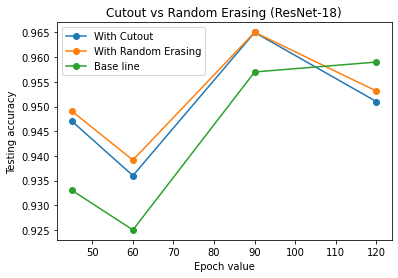

In [98]:
Epoch = [45,60,90,120]
base_line = [ResNet18_NoCutOut_SVHN['test_acc'][45],ResNet18_NoCutOut_SVHN['test_acc'][60],ResNet18_NoCutOut_SVHN['test_acc'][90],ResNet18_NoCutOut_SVHN['test_acc'][120]]
cutout_accurices = [ResNet18_cutOut_SVHN_patch_20['test_acc'][45],ResNet18_cutOut_SVHN_patch_20['test_acc'][60],ResNet18_cutOut_SVHN_patch_20['test_acc'][90],ResNet18_cutOut_SVHN_patch_20['test_acc'][120]]
random_accurices = [RandomErase_SVHN_random['test_acc'][45],RandomErase_SVHN_random['test_acc'][60],RandomErase_SVHN_random['test_acc'][90],RandomErase_SVHN_random['test_acc'][120]]

plt.plot(Epoch,cutout_accurices,label = "With Cutout",marker='o')
plt.plot(Epoch,random_accurices,label = "With Random Erasing",marker='o')
plt.plot(Epoch,base_line,label = "Base line",marker='o')
plt.title('Cutout vs Random Erasing (ResNet-18)')
plt.xlabel('Epoch value')
plt.ylabel('Testing accuracy')
plt.legend()
plt.show()
